In [1]:
## <ins>Data Science Bootcamp - 3th Day- Statistics and ML</ins>

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Exercises
# Data types
A: Consider the following data and figure out what category of data they are.<br>
nominal, ordinal, discrete, continous

What is your ethnicity?
– Central Asian
- Indonesian
- West Asian
- Japanese
- Indian

B: The revenue from sales of a company:
- $2.8b

C: The number of sales of a company:
- Product A: 1753
- Product B: 104357
- Product C: 3

D: Grades in school (only the round numbers can be used as grades):
- 1
- 2
- 3
- 4
- 5
- 6
 

## Solution:
- A: nominal, there is no order of ethnicities and for the sake of simplicity no mixed  
- B: numerical, the revenue is on a continuous scale 
- C: discrete, numerical count numbers, but as a group they are discrete
- D: ordinal, clear hierarchy  of the categories

# Probabilities
What of the following are probailites?
- A: P(X) = -0.1
- B: P(X) = 1.1
- C: P(X) = 1.0
- D: P(X) = 0.4

## Solution:
- A: not a probability, negativ
- B: not a probability, above 1
- C: probability, event X always happens
- D: probability

# Confidence intervall:
We want to calculate the confidence intervall of a given data set.<br> We will be using the 0.95 confidence level.<br>
$\bar{X}$ is the mean of data set.<br>
$u$  is the quantile value.<br>
$\sigma$ is the standartdeviation.<br>
$n$ is the number of oberservations.<br>

Formula for the normal distribution:<br>
$[upper, lower] = \bar{X}\pm u\cdot\frac{\sigma}{\sqrt{n}}$

In [3]:
data = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] #given dataset
n = len(data) #number of data points
#uncomment the next lime and caculate the mean the the dataset
x = sum(data)/len(data) 
print(x) 

71.0


In [4]:
sigma = np.std(data) #calculates the standartdeviation of the dataset
print(sigma)

17.23948955160796


In [5]:
u = 2.821
#write here the formula for the upper and lower bound of the confidence intervall
#note the root of a variable is math.sqrt(x)
upper = x+u*sigma/math.sqrt(n)
lower = x-u*sigma/math.sqrt(n)
print(lower, upper)

55.62102153847662 86.37897846152337


Between 55.62 and 86.38 0.95 percent of all values of the distribution will be located.

# Choose which kind of ML might the most fitting for the problem:
- Predict the future returns of a company.
- Data, in which we want to find commonalities, group them together into categories to better advertise to them.
- We want to train a robot to do complex maneuvers, but we dont have a lot of preexisting data to train the robot on.


## Solution
- A supervised model would probably fit the most, to add to that a time-series model like ARIMA would be a great fit.
- Unsupervised learning, since we want to form clusters of people with commonalities.
- Reinforcement learning might be a great fit, since we can train the robot on its own mistakes 

# Linear regression
In order to get used to the simplest form of ML, linear regression. We will use a randomly crea

In [6]:
np.random.seed(42)
#Randomly creates data
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

In [7]:
from sklearn.model_selection import train_test_split

#change the "Nones" below to split the data into two set, note the dataset are X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) #split the dataset into two, by half/0.5

In [8]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
#add the above created training dataset to the fit
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)#gets the R^2 of the modell
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


 Using the NNLS loss-function, we the $R^2$ of the model.<br>
 $R^2$ is the measesure of how much variance of the model is explained by the model. Generally the higher the better. Our 0.82 is fine.

In [9]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.743692629170035


The OLS loss-function gets us a worse $R^2$, but still a resonable fit.

Next we plot the data and regression line to see, how it fits.

Text(0, 0.5, 'NNLS regression coefficients')

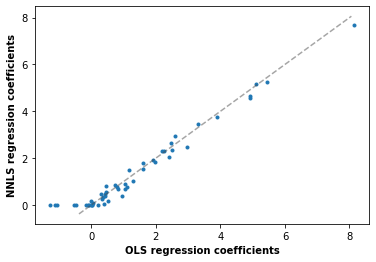

In [10]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")